In [1]:
import ambulance_game as abg
import matplotlib.pyplot as plt
import nashpy as nash
import numpy as np

# Parameters

In [2]:
lambda_2 = 8
target = 2
alpha = 0.5
p_hat = 0.7

lambda_1_1 = 1
lambda_1_2 = 2
mu_1 = 3
mu_2 = 1
num_of_servers_1 = 2
num_of_servers_2 = 3
system_capacity_1 = 10
system_capacity_2 = 10
buffer_capacity_1 = 5
buffer_capacity_2 = 5

# Game

In [3]:
A, B, R = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    target=target,
    alpha=alpha,
    p_hat=p_hat,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
)

In [4]:
A

array([[0.9115845 , 0.9115845 , 0.9115845 , 0.9115845 , 0.9115845 ,
        0.9115845 , 0.9115845 , 0.9115845 , 0.9115845 , 0.9115845 ],
       [0.91183761, 0.91183761, 0.91183761, 0.91183697, 0.91183638,
        0.91183575, 0.91183501, 0.91183392, 0.91183165, 0.91182141],
       [0.91356072, 0.91356072, 0.91356072, 0.91355106, 0.91354187,
        0.913532  , 0.91352032, 0.91350342, 0.91346863, 0.91332266],
       [0.91682125, 0.91682125, 0.91682125, 0.91679029, 0.9167599 ,
        0.91672703, 0.91668797, 0.91663134, 0.91651481, 0.91603694],
       [0.92269975, 0.92269975, 0.92269975, 0.92262611, 0.92255206,
        0.9224715 , 0.92237523, 0.92223508, 0.92194597, 0.92077361],
       [0.93248915, 0.93248915, 0.93248915, 0.93234302, 0.93219335,
        0.93202944, 0.93183237, 0.93154393, 0.93094552, 0.92852102],
       [0.94703061, 0.94703061, 0.94703061, 0.94678604, 0.94653134,
        0.94625038, 0.94591024, 0.94540876, 0.94435876, 0.94005549],
       [0.96544659, 0.96544659, 0.9654465

In [5]:
B

array([[0.99600779, 0.99626861, 0.99879407, 0.9995757 , 0.99132402,
        0.96772538, 0.92306401, 0.85305618, 0.7624909 , 0.68993694],
       [0.99600779, 0.99600779, 0.99600779, 0.99856548, 0.99998822,
        0.99641969, 0.98284391, 0.95136865, 0.88507999, 0.76372549],
       [0.99600779, 0.99600779, 0.99600779, 0.99846851, 0.99999848,
        0.99680587, 0.98403583, 0.95407463, 0.89060689, 0.77295084],
       [0.99600779, 0.99600779, 0.99600779, 0.99840353, 0.99999995,
        0.99705377, 0.98482902, 0.95592819, 0.89450983, 0.78018319],
       [0.99600779, 0.99600779, 0.99600779, 0.99835973, 0.99999854,
        0.99721781, 0.98537034, 0.95722749, 0.89736158, 0.78593902],
       [0.99600779, 0.99600779, 0.99600779, 0.9983296 , 0.99999644,
        0.99733   , 0.98575018, 0.95816136, 0.8994858 , 0.79058841],
       [0.99600779, 0.99600779, 0.99600779, 0.99830582, 0.99999416,
        0.99741605, 0.98604433, 0.95889068, 0.90117155, 0.79447167],
       [0.99600779, 0.99600779, 0.9960077

In [6]:
game = nash.Game(A, B)

In [7]:
demo_1, demo_2 = (game.lemke_howson(initial_dropped_label=0))
demo_1, demo_2

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


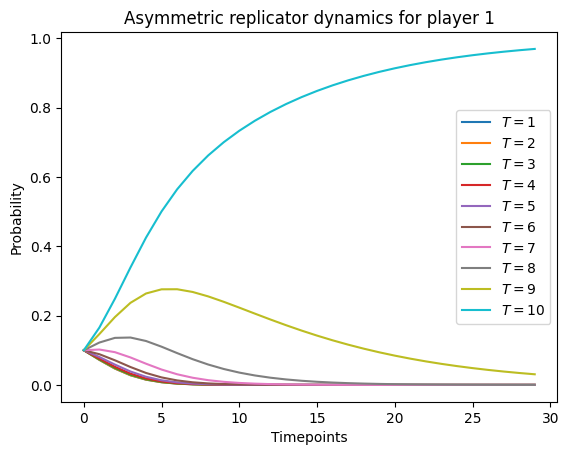

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


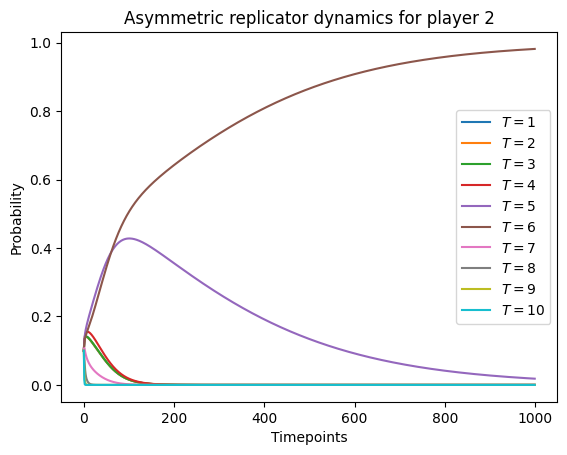

In [8]:
xs,ys = game.asymmetric_replicator_dynamics(timepoints=np.linspace(0, 10000, 1000))
plt.plot(xs[0:30])
plt.legend([f"$T = {{{i+1}}}$" for i in range(len(xs[0]))])
plt.title("Asymmetric replicator dynamics for player 1")
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.savefig("../ard_p1.eps")
plt.show();

plt.plot(ys)
plt.legend([f"$T = {{{i+1}}}$" for i in range(len(ys[0]))])
plt.title("Asymmetric replicator dynamics for player 2")
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.savefig("../ard_p2.eps")
plt.show();

# Waiting times

In [9]:
threshold_1 = 10
threshold_2 = 6
prop_A = R[threshold_1 - 1, threshold_2 - 1]
prop_A

0.9493655232875885

In [10]:
mean_wait_1 = abg.markov.get_mean_waiting_time_using_markov_state_probabilities(
    lambda_2=lambda_2 * prop_A,
    lambda_1=lambda_1_1,
    mu=mu_1,
    num_of_servers=num_of_servers_1,
    threshold=threshold_1,
    system_capacity=system_capacity_1,
    buffer_capacity=buffer_capacity_1,
)
mean_wait_1

1.2573867034257717

In [11]:
mean_wait_1 + (1 / mu_1)

1.590720036759105

In [12]:
mean_wait_2 = abg.markov.get_mean_waiting_time_using_markov_state_probabilities(
    lambda_2=lambda_2 * (1 - prop_A),
    lambda_1=lambda_1_2,
    mu=mu_2,
    num_of_servers=num_of_servers_2,
    threshold=threshold_2,
    system_capacity=system_capacity_2,
    buffer_capacity=buffer_capacity_2,
)
mean_wait_2

0.6318649846772917

In [13]:
mean_wait_2 + (1 / mu_2)

1.6318649846772917